In [1]:
"""from google.colab import drive
drive.mount('/content/mydrive')"""

"from google.colab import drive\ndrive.mount('/content/mydrive')"

## Train Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Dataset\Policy Data\train_Df64byy.csv")
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.describe(include=['int','float'])

,Holding_Policy_Type,Reco_Policy_Premium
count,30631.000000,50882.000000
mean,2.439228,14183.950069
std,1.025923,6590.074873
min,1.000000,2280.000000
25%,1.000000,9248.000000
50%,3.000000,13178.000000
75%,3.000000,18096.000000
max,4.000000,43350.400000


In [6]:
df.describe(include='O')

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

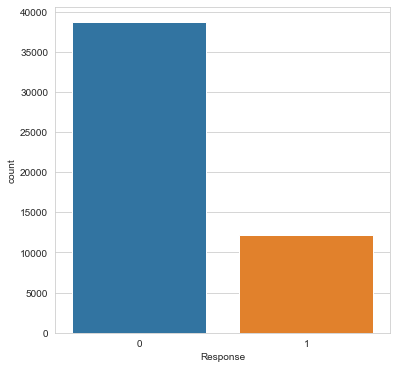

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(df.Response)

In [8]:
df.Response.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [9]:
missing_value=pd.DataFrame(df.isnull().sum())/len(df)*100
missing_value

,0
ID,0.000000
City_Code,0.000000
Region_Code,0.000000
Accomodation_Type,0.000000
Reco_Insurance_Type,0.000000
Upper_Age,0.000000
Lower_Age,0.000000
Is_Spouse,0.000000
Health Indicator,22.976691
Holding_Policy_Duration,39.799929


**Replacing The Health Indicator, Holding_Policy_Duration & Holding_Policy_Type  Columns**

In [10]:
df['Holding_Policy_Duration'].value_counts()

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64

In [11]:
# Mapping {'14+' with '15'}
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].replace('14+', 15)

In [12]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [13]:
df['Holding_Policy_Type'].value_counts()

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [14]:
df['Holding_Policy_Duration'].mode()

0    1.0
dtype: object

In [15]:
from sklearn.impute import SimpleImputer

impute_size=SimpleImputer(strategy='most_frequent')
df['Health Indicator']       =impute_size.fit_transform(df[['Health Indicator']])
df['Holding_Policy_Type']    =impute_size.fit_transform(df[['Holding_Policy_Type']])
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0])

In [16]:
missing_value=pd.DataFrame(df.isnull().sum())/len(df)*100
missing_value

,0
ID,0.0
City_Code,0.0
Region_Code,0.0
Accomodation_Type,0.0
Reco_Insurance_Type,0.0
Upper_Age,0.0
Lower_Age,0.0
Is_Spouse,0.0
Health Indicator,0.0
Holding_Policy_Duration,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  object 
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [18]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
objectlist=df.select_dtypes(include='O').columns

for i in objectlist:
  df[i]=le.fit_transform(df[i].astype(str))

In [19]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,6,3.0,22,11628.0,0
1,2,31,1117,0,1,75,22,0,1,0,3.0,22,30510.0,0
2,3,31,3732,0,0,32,32,0,0,0,1.0,19,7450.0,1
3,4,16,4378,0,1,52,48,0,0,6,3.0,19,17780.0,0
4,5,34,2190,1,0,44,44,0,1,8,1.0,16,10404.0,0


In [20]:
for i in df.columns:
  df[i]=df[i].astype(int)

df.dtypes

ID                         int32
City_Code                  int32
Region_Code                int32
Accomodation_Type          int32
Reco_Insurance_Type        int32
Upper_Age                  int32
Lower_Age                  int32
Is_Spouse                  int32
Health Indicator           int32
Holding_Policy_Duration    int32
Holding_Policy_Type        int32
Reco_Policy_Cat            int32
Reco_Policy_Premium        int32
Response                   int32
dtype: object

In [21]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213,1,0,36,36,0,0,6,3,22,11628,0
1,2,31,1117,0,1,75,22,0,1,0,3,22,30510,0
2,3,31,3732,0,0,32,32,0,0,0,1,19,7450,1
3,4,16,4378,0,1,52,48,0,0,6,3,19,17780,0
4,5,34,2190,1,0,44,44,0,1,8,1,16,10404,0


In [22]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))).sum()

ID                             0
City_Code                      0
Region_Code                  201
Accomodation_Type              0
Reco_Insurance_Type        10346
Upper_Age                      0
Lower_Age                      0
Is_Spouse                   8422
Health Indicator             337
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium          821
Response                   12209
dtype: int64

<AxesSubplot:ylabel='Reco_Policy_Premium'>

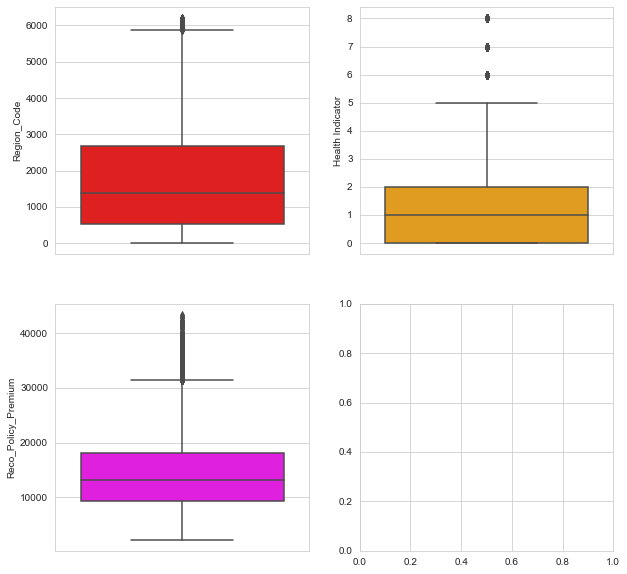

In [23]:
fig, ax = plt.subplots(2,2,figsize = (10,10))
sns.boxplot(y='Region_Code',data=df, ax=ax[0,0], color='red',orient="v")

#sns.boxplot(y='Reco_Insurance_Type',data=df, ax=ax[0,1], color='blue',orient="v")

#sns.boxplot(y='Is_Spouse',data=df, ax=ax[1,0], color='orange',orient="v")

sns.boxplot(y='Health Indicator',data=df, ax=ax[0,1], color='orange',orient="v")

sns.boxplot(y='Reco_Policy_Premium',data=df, ax=ax[1,0], color='magenta',orient="v")

#sns.boxplot(y='Response',data=df, ax=ax[2,1], color='yellow',orient="v")

In [24]:
columns=['Region_Code','Reco_Insurance_Type','Is_Spouse','Health Indicator','Reco_Policy_Premium']
for i in columns:
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75-q25
    minimum=q25-1.5*iqr
    maximum=q75+1.5*iqr
    df.loc[df[i] < minimum, i]=minimum
    df.loc[df[i] > maximum, i]=maximum

In [25]:
((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   12209
dtype: int64

In [26]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,22,3213.0,1,0.0,36,36,0.0,0.0,6,3,22,11628.0,0
1,2,31,1117.0,0,0.0,75,22,0.0,1.0,0,3,22,30510.0,0
2,3,31,3732.0,0,0.0,32,32,0.0,0.0,0,1,19,7450.0,1
3,4,16,4378.0,0,0.0,52,48,0.0,0.0,6,3,19,17780.0,0
4,5,34,2190.0,1,0.0,44,44,0.0,1.0,8,1,16,10404.0,0


## Test Data 

In [27]:
df2=pd.read_csv(r"C:\Users\Lenovo\Desktop\Dataset\Policy Data\test_YCcRUnU.csv")
df2.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [28]:
missing_value=pd.DataFrame(df2.isnull().sum())/len(df)*100
missing_value

,0
ID,0.000000
City_Code,0.000000
Region_Code,0.000000
Accomodation_Type,0.000000
Reco_Insurance_Type,0.000000
Upper_Age,0.000000
Lower_Age,0.000000
Is_Spouse,0.000000
Health Indicator,9.879722
Holding_Policy_Duration,16.907747


**Replacing The Health Indicator, Holding_Policy_Duration & Holding_Policy_Type Columns**

In [29]:
df2['Holding_Policy_Duration'].value_counts()

14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64

In [30]:
# Mapping {'14+' with '15'}
df2['Holding_Policy_Duration']=df2['Holding_Policy_Duration'].replace('14+', 15)

In [31]:
df2['Health Indicator'].value_counts()

X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64

In [32]:
df2['Holding_Policy_Type'].value_counts()

3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64

In [33]:
df2['Holding_Policy_Duration'].mode()

0    15
dtype: object

In [34]:
impute_size=SimpleImputer(strategy='most_frequent')
df2['Health Indicator']       =impute_size.fit_transform(df2[['Health Indicator']])
df2['Holding_Policy_Type']    =impute_size.fit_transform(df2[['Holding_Policy_Type']])
df2['Holding_Policy_Duration']=df2['Holding_Policy_Duration'].fillna(df2['Holding_Policy_Duration'].mode()[0])

In [35]:
missing_value=pd.DataFrame(df2.isnull().sum())/len(df)*100
missing_value

,0
ID,0.0
City_Code,0.0
Region_Code,0.0
Accomodation_Type,0.0
Reco_Insurance_Type,0.0
Upper_Age,0.0
Lower_Age,0.0
Is_Spouse,0.0
Health Indicator,0.0
Holding_Policy_Duration,0.0


In [36]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
objectlist=df2.select_dtypes(include='O').columns

for i in objectlist:
    df2[i]=le.fit_transform(df2[i].astype(str))

In [37]:
df2.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,0,156,0,0,30,30,0,0,11,3.0,5,11934.0
1,50884,30,7,0,1,69,68,1,0,8,3.0,18,32204.8
2,50885,0,564,1,0,28,28,0,2,7,4.0,17,9240.0
3,50886,22,1177,1,0,23,23,0,2,8,3.0,18,9086.0
4,50887,0,951,0,0,75,75,0,2,6,3.0,5,22534.0


In [38]:
for i in df2.columns:
    df2[i]=df2[i].astype(int)

df2.dtypes

ID                         int32
City_Code                  int32
Region_Code                int32
Accomodation_Type          int32
Reco_Insurance_Type        int32
Upper_Age                  int32
Lower_Age                  int32
Is_Spouse                  int32
Health Indicator           int32
Holding_Policy_Duration    int32
Holding_Policy_Type        int32
Reco_Policy_Cat            int32
Reco_Policy_Premium        int32
dtype: object

In [39]:
q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
IQR=q3-q1

((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR))).sum()

ID                            0
City_Code                     0
Region_Code                  58
Accomodation_Type             0
Reco_Insurance_Type        4464
Upper_Age                     0
Lower_Age                     0
Is_Spouse                  3578
Health Indicator            165
Holding_Policy_Duration    4204
Holding_Policy_Type           0
Reco_Policy_Cat               0
Reco_Policy_Premium         291
dtype: int64

<AxesSubplot:ylabel='Reco_Policy_Premium'>

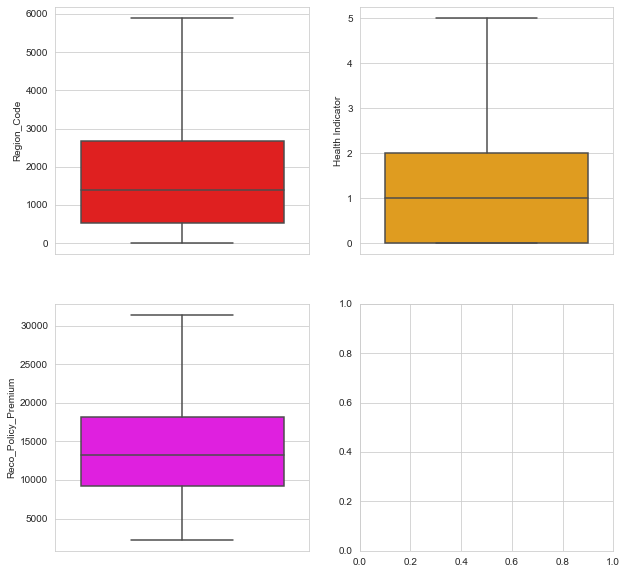

In [40]:
fig, ax = plt.subplots(2,2,figsize = (10,10))
sns.boxplot(y='Region_Code',data=df, ax=ax[0,0], color='red',orient="v")

#sns.boxplot(y='Reco_Insurance_Type',data=df, ax=ax[0,1], color='blue',orient="v")

#sns.boxplot(y='Is_Spouse',data=df, ax=ax[1,0], color='orange',orient="v")

sns.boxplot(y='Health Indicator',data=df, ax=ax[0,1], color='orange',orient="v")

#sns.boxplot(y='Holding_Policy_Duration',data=df, ax=ax[2,0], color='yellow',orient="v")

sns.boxplot(y='Reco_Policy_Premium',data=df, ax=ax[1,0], color='magenta',orient="v")

In [41]:
columns=['Region_Code','Health Indicator','Reco_Policy_Premium','Holding_Policy_Duration','Is_Spouse','Reco_Insurance_Type']
for i in columns:
    q75,q25=np.percentile(df2[i],[75,25])
    iqr=q75-q25
    minimum=q25-1.5*iqr
    maximum=q75+1.5*iqr
    df2.loc[df2[i] < minimum, i]=minimum
    df2.loc[df2[i] > maximum, i]=maximum

In [42]:
((df2 < (q1-1.5*IQR)) | (df2 > (q3+1.5*IQR))).sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [43]:
X=df.drop('Response',axis=1)
y=df[['Response']]

In [44]:
y.head()

,Response
0,0
1,0
2,1
3,0
4,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=39)
print(X_train.shape)  
print(y_train.shape)
print(X_test.shape)  
print(y_test.shape)

(40705, 13)
(40705, 1)
(10177, 13)
(10177, 1)


In [46]:
print('Dataset: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Train: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Test: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Dataset: Class0=50882, Class1=50882
Train: Class0=40705, Class1=40705
Test: Class0=10177, Class1=10177


## ROC and Precision-Recall Curves 

No Skill ROC AUC 0.503


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Logistic ROC AUC 0.498


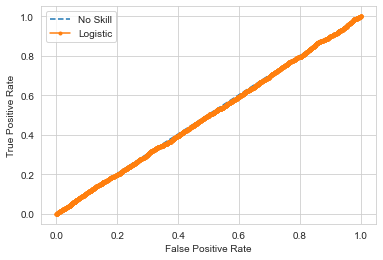

In [47]:
# ROC CURVES & ROC AUC ON AN IMBALANCED DATASET
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Plot No Skill & Model ROC Curves
def plot_roc_curve(y_test, naive_probs, model_probs):
	# plot naive skill roc curve
	fpr, tpr, _ = roc_curve(y_test, naive_probs)
	pyplot.plot(fpr, tpr, linestyle='--', label='No Skill')
	# plot model roc curve
	fpr, tpr, _ = roc_curve(y_test, model_probs)
	pyplot.plot(fpr, tpr, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('False Positive Rate')
	pyplot.ylabel('True Positive Rate')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()


# No Skill Model, Stratified Random Class Predictions
model = DummyClassifier(strategy='stratified')
model.fit(X_train,y_train)
yhat = model.predict_proba(X_test)
naive_probs = yhat[:,1]
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test,naive_probs )
print('No Skill ROC AUC %.3f' % roc_auc)

# Skilled Model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train,y_train)
yhat = model.predict_proba(X_test)
model_probs = yhat[:,1]
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, model_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

# Plot ROC Curves
plot_roc_curve(y_test, naive_probs, model_probs)

No Skill PR AUC: 0.329


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Logistic PR AUC: 0.236


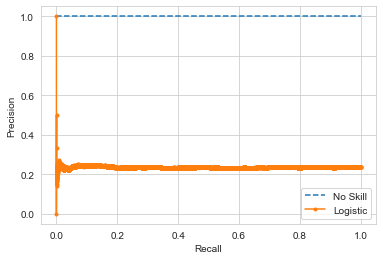

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Plot No Skill & Model ROC Curves
def plot_pr_curve(y_test, model_probs):
	# calculate the no skill line as the proportion of the positive class
	no_skill = len(y_test[y_test==1]) / len(y_test)
	# plot the no skill precision-recall curve
	pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
	# plot model precision-recall curve
	precision, recall, _ = precision_recall_curve(y_test, model_probs)
	pyplot.plot(recall, precision, marker='.', label='Logistic')
	# axis labels
	pyplot.xlabel('Recall')
	pyplot.ylabel('Precision')
	# show the legend
	pyplot.legend()
	# show the plot
	pyplot.show()
 
# No Skill Model
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
naive_probs = yhat[:, 1]

# Calculate The Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, naive_probs)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

# Fit A Model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
model_probs = yhat[:, 1]

# Calculate The Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)

# Plot Precision-Recall Curves
plot_pr_curve(y_test, model_probs)

## Evaluating a Decision Tree With Random Oversampling 

In [49]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [50]:
#Define Pipeline
steps=[('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

#Evaluate Pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)

score = mean(scores)
print('F-measure: %.3f' % score)

F-measure: 0.669


## Evaluating a Decision Tree With Random Oversampling Using SMOTE

In [51]:
X=df.drop('Response',axis=1)
y=df[['Response']]

In [52]:
from numpy import where
from collections import Counter
from imblearn.over_sampling import SMOTE

# Transform The Dataset
oversample = SMOTE()
X_train_res,y_train_res = oversample.fit_resample(X_train,np.ravel(y_train))

# summarize the new class distribution
counter = Counter(y)
print(Counter(y_train_res==1))
print(Counter(y_train_res==0))

Counter({False: 30902, True: 30902})
Counter({True: 30902, False: 30902})


In [53]:
# Define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

# Evaluate Pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train_res,y_train_res, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.733


## Combined SMOTE and Tomek Links Sampling For Classification 

In [58]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [59]:
# define model
model = DecisionTreeClassifier()

# define sampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.525


In [63]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=5)
lgbm.fit(X_train,y_train)
y_pred=lgbm.predict(X_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lgbm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.6646560527861489

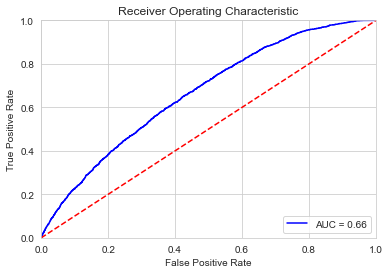

In [69]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
# calculate the fpr and tpr for all thresholds of the classification
probs = lgbm.predict_proba(df2)
preds = probs[:,1]
preds

array([0.23442185, 0.34671446, 0.20835555, ..., 0.00141242, 0.2660506 ,
       0.13776329])

In [72]:
ID = df2['ID'].values

In [73]:
submission = pd.DataFrame({'ImageId':ID,'Response':preds,}).set_index('ImageId')
submission.head()

,Response
ImageId,
50883,0.234422
50884,0.346714
50885,0.208356
50886,0.155584
50887,0.309304


In [75]:
submission.to_csv(r'C:\Users\Lenovo\Desktop\Python\New Project\Health Insurance Policy\Health_Insurance_Policy_test.csv', 
                  columns=['Response'])

These all observation.
1. Random Forest class_balanced will never impacted your model accuracy
2. class imbalnce with Gaussian never gives us right accuracy
3. Weights Paremeters doen't work imbalance
4. Probabalistics methods also didn't solved the problem imbalance
5. Poor Pefroramace on STOME
6. Poor Perforomance on SMOTE +SMOTETomek
7. No performance impormace over SMOTE over sampling
8. U never think of Performance if your using Undersampling
7. Lots f Books and Online class room talks aboutimbalance data. but i may work on small sample.
8. XG Boost works some better
9. LightGBM Worked very well.its master piece for class imbalance.
10. Even trained Model on Deep learning No improvement perforamance with help of Pycaret having paramete class_imbalance is  True, But No effect on IT.even pycaret works well because it handles XGBOOST, LIGHTGBM perfec AutoViml having class imbalance = SMOTE, It will never effect model ROC AUC score.